In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from keras.callbacks import EarlyStopping
from xgboost import XGBClassifier, plot_importance

In [112]:
df=pd.read_csv('Customer-Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [5]:
# inspect data --'Total Charges' column should be numerical data type, 'SeniorCitizen' should be 'object'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [113]:
# change the datatype of the two identifed columns
df['SeniorCitizen']=df.SeniorCitizen.astype('str')
df['SeniorCitizen'].dtype

dtype('O')

In [114]:
df['TotalCharges']=np.where(df['TotalCharges']==" ", np.nan, df['TotalCharges'])
df['TotalCharges'].isnull().sum()

11

In [115]:
# drop the null value
df.dropna(inplace=True)
df.shape

(7032, 21)

In [116]:
# change the 'TotalCharges' column to numerical
df['TotalCharges']=df['TotalCharges'].apply(pd.to_numeric)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B2EC26610>,
      dtype=object)

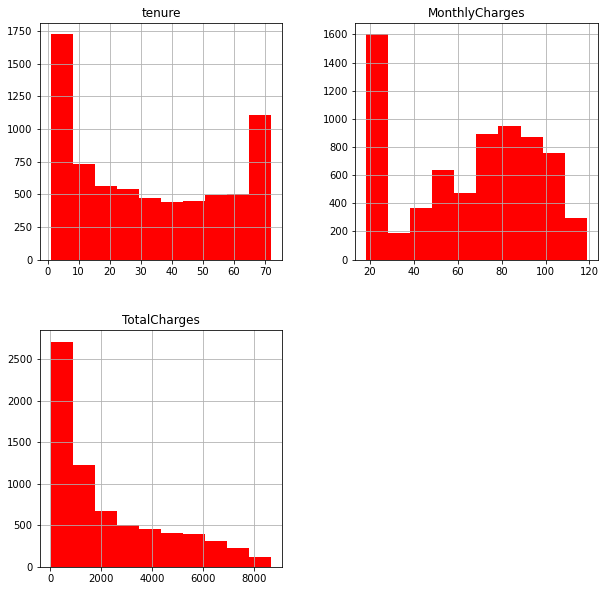

In [9]:
# EDA Process for numerical columns
df.hist(bins=10, figsize=(10,10), color='r')

In [117]:
# covert the target to number
df['Churn']=np.where(df['Churn']=='Yes', 1, 0)

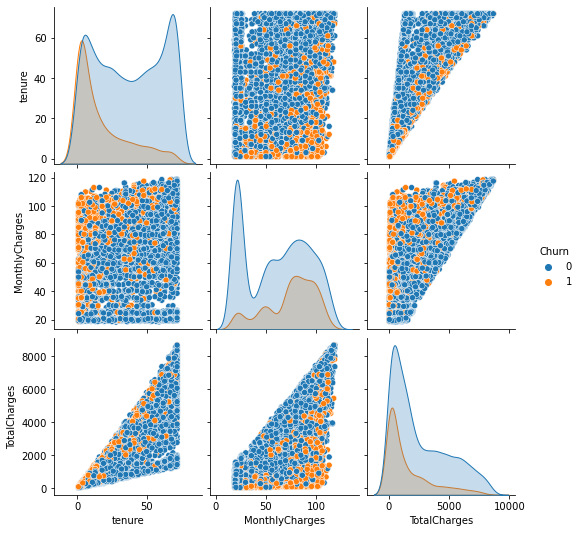

In [96]:
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')

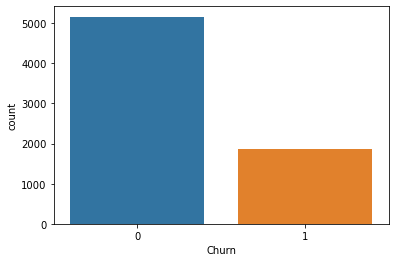

In [13]:
# label distribution
sns.countplot(df['Churn'])
plt.show()

In [24]:
# create the two dataframes for churned and not_churned customers
churned=df[df.Churn==1]
not_churned=df[df.Churn==0]
churned_percentage=len(churned)/len(df)
not_churned=len(not_churned)/len(df)
print(f'Churned customers are {round(churned_percentage*100,2)} percent')

Churned customers are 26.58 percent


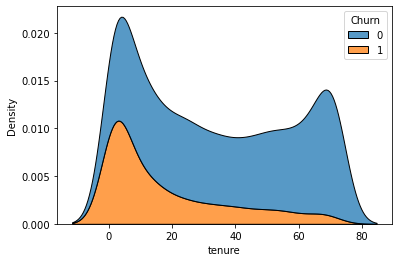

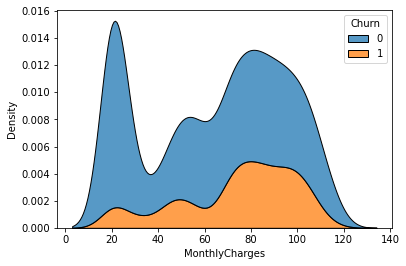

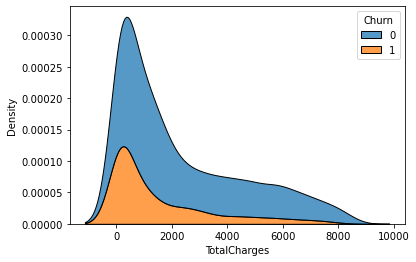

In [57]:
# Using KDE (Kernal Density Estimate) check the probability dentisity of num columns
num.remove('Churn')
for col in num:
    sns.kdeplot(x=col, data=df, hue='Churn', shade=True, multiple='stack')

    plt.xlabel(col)
    plt.show()

####
* the customers with monthly charges increase (between 70 and 100) and less than 10 years tenure, tend to churn
* the totalcharges have the same distribution between churned and  not_churn 

In [118]:
# seprate the numerical columns and categorical columns
cat=df.select_dtypes(np.object).columns.to_list()
num=df.select_dtypes(np.number).columns.to_list()
print(cat,num)


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'] ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [119]:
cat.remove('customerID')

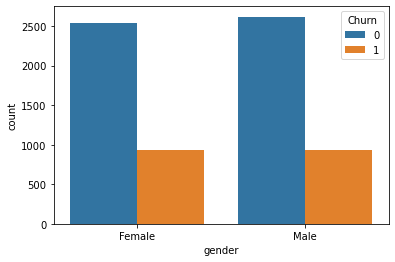

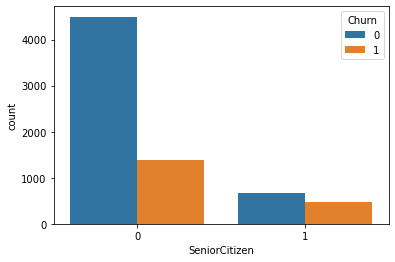

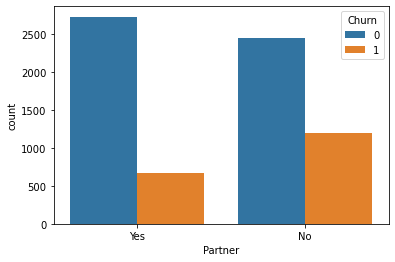

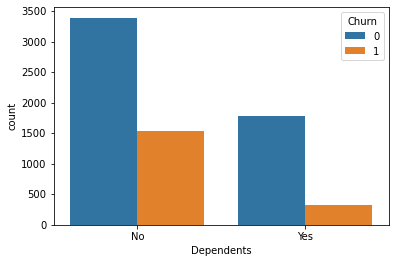

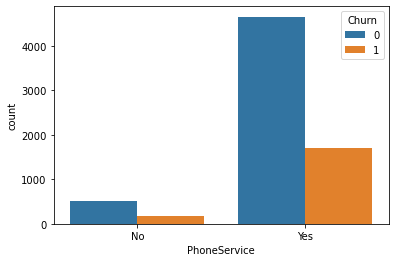

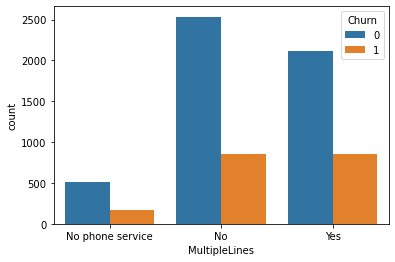

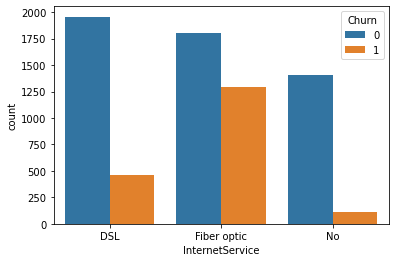

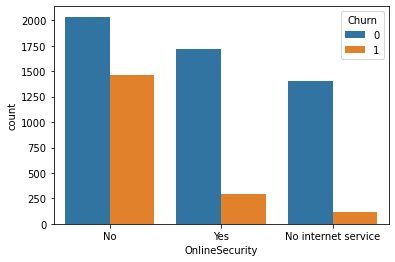

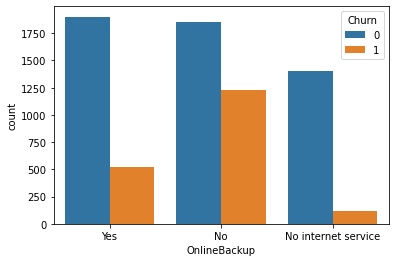

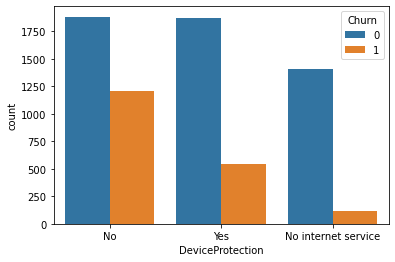

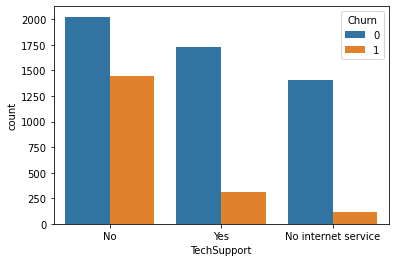

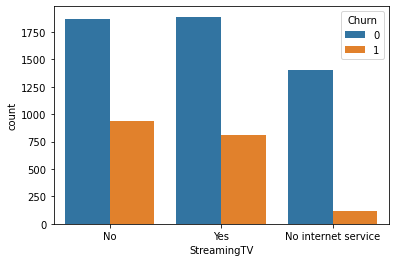

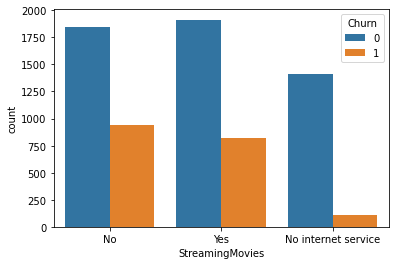

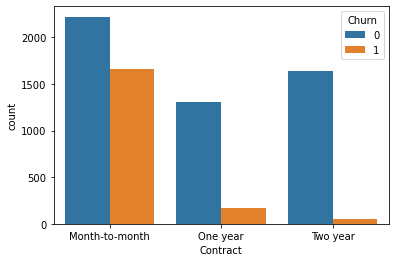

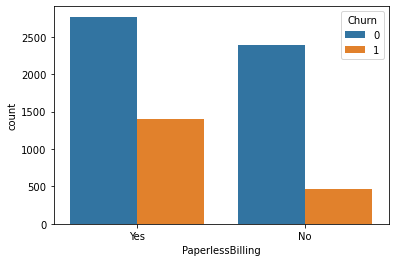

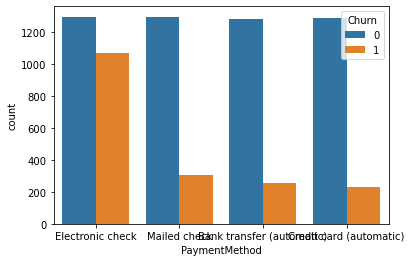

In [102]:
# check the categorical distribution values among the churn and non-churn class
for col in cat: 
       sns.countplot(x=col, hue='Churn', data=df)
       plt.show()

### EDA findings: based on different service and demographic group: customers who using electronic check, paperlessbilling, month-to-month contract,no tech support, no internet service, no online security, no online backup, no device protection, having fiber optic service, no partner, no dependent, being senior citizen are more tend to churn. And the same gender distribution between Churn and non-churned class. So gender can be removed from the predictors 

In [120]:
target=df['Churn']
df_pre=df.drop(columns=['customerID', 'gender','Churn'], axis=1)
df_pre.head()

SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0             0     Yes         No       1           No  No phone service   
1             0      No         No      34          Yes                No   
2             0      No         No       2          Yes                No   
3             0      No         No      45           No  No phone service   
4             0      No         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  
0           Electronic check           29.85         29.85  
1               Mailed check           56.95       1889.50  
2               Mailed check           53.85        108.15  
3  Bank transfer (automatic)           42.30       1840.75  
4           Electronic check           70.70        151.65

In [121]:
num.remove('Churn')

In [122]:
cat.remove('gender')

In [135]:
cat

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [153]:
# one hot encoder the categorical columns
onehot=OneHotEncoder()
df_cat=onehot.fit_transform(df[cat]).toarray()
df_cat=pd.DataFrame(df_cat, columns=onehot.get_feature_names())

In [151]:
df_cat

x0_0  x0_1  x1_No  x1_Yes  x2_No  x2_Yes  x3_No  x3_Yes  x4_No  \
0      1.0   0.0    0.0     1.0    1.0     0.0    1.0     0.0    0.0   
1      1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   
2      1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   
3      1.0   0.0    1.0     0.0    1.0     0.0    1.0     0.0    0.0   
4      1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   
...    ...   ...    ...     ...    ...     ...    ...     ...    ...   
7027   1.0   0.0    0.0     1.0    0.0     1.0    0.0     1.0    0.0   
7028   1.0   0.0    0.0     1.0    0.0     1.0    0.0     1.0    0.0   
7029   1.0   0.0    0.0     1.0    0.0     1.0    1.0     0.0    0.0   
7030   0.0   1.0    0.0     1.0    1.0     0.0    0.0     1.0    0.0   
7031   1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   

      x4_No phone service  ...  x11_Yes  x12_Month-to-month  x12_One year  \
0                     1.0  ...      0.0                 1.0           0.0   
1                     0.0  ...      0.0                 0.0           1.0   
2                     0.0  ...      0.0                 1.0           0.0   
3                     1.0  ...      0.0                 0.0           1.0   
4                     0.0  ...      0.0                 1.0           0.0   
...                   ...  ...      ...                 ...           ...   
7027                  0.0  ...      1.0                 0.0           1.0   
7028                  0.0  ...      1.0                 0.0           1.0   
7029                  1.0  ...      0.0                 1.0           0.0   
7030                  0.0  ...      0.0                 1.0           0.0   
7031                  0.0  ...      1.0                 0.0           0.0   

      x12_Two year  x13_No  x13_Yes  x14_Bank transfer (automatic)  \
0              0.0     0.0      1.0                            0.0   
1              0.0     1.0      0.0                            0.0   
2              0.0     0.0      1.0                            0.0   
3              0.0     1.0      0.0                            1.0   
4              0.0     0.0      1.0                            0.0   
...            ...     ...      ...                            ...   
7027           0.0     0.0      1.0                            0.0   
7028           0.0     0.0      1.0                            0.0   
7029           0.0     0.0      1.0                            0.0   
7030           0.0     0.0      1.0                            0.0   
7031           1.0     0.0      1.0                            1.0   

      x14_Credit card (automatic)  x14_Electronic check  x14_Mailed check  
0                             0.0                   1.0               0.0  
1                             0.0                   0.0               1.0  
2                             0.0                   0.0               1.0  
3                             0.0                   0.0               0.0  
4                             0.0                   1.0               0.0  
...                           ...                   ...               ...  
7027                          0.0                   0.0               1.0  
7028                          1.0                   0.0               0.0  
7029                          0.0                   1.0               0.0  
7030                          0.0                   0.0               1.0  
7031                          0.0                   0.0               0.0  

[7032 rows x 41 columns]

In [147]:
# scale the numerical columns
scaler=StandardScaler()
df_num=scaler.fit_transform(df[num])
df_num=pd.DataFrame(df_num, columns=num)
df_num


tenure  MonthlyCharges  TotalCharges
0    -1.280248       -1.161694     -0.994194
1     0.064303       -0.260878     -0.173740
2    -1.239504       -0.363923     -0.959649
3     0.512486       -0.747850     -0.195248
4    -1.239504        0.196178     -0.940457
...        ...             ...           ...
7027 -0.343137        0.664868     -0.129180
7028  1.612573        1.276493      2.241056
7029 -0.872808       -1.170004     -0.854514
7030 -1.158016        0.319168     -0.872095
7031  1.368109        1.357932      2.012344

[7032 rows x 3 columns]

In [154]:
predictors=pd.concat([df_cat,df_num],axis=1)
predictors

x0_0  x0_1  x1_No  x1_Yes  x2_No  x2_Yes  x3_No  x3_Yes  x4_No  \
0      1.0   0.0    0.0     1.0    1.0     0.0    1.0     0.0    0.0   
1      1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   
2      1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   
3      1.0   0.0    1.0     0.0    1.0     0.0    1.0     0.0    0.0   
4      1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   
...    ...   ...    ...     ...    ...     ...    ...     ...    ...   
7027   1.0   0.0    0.0     1.0    0.0     1.0    0.0     1.0    0.0   
7028   1.0   0.0    0.0     1.0    0.0     1.0    0.0     1.0    0.0   
7029   1.0   0.0    0.0     1.0    0.0     1.0    1.0     0.0    0.0   
7030   0.0   1.0    0.0     1.0    1.0     0.0    0.0     1.0    0.0   
7031   1.0   0.0    1.0     0.0    1.0     0.0    0.0     1.0    1.0   

      x4_No phone service  ...  x12_Two year  x13_No  x13_Yes  \
0                     1.0  ...           0.0     0.0      1.0   
1                     0.0  ...           0.0     1.0      0.0   
2                     0.0  ...           0.0     0.0      1.0   
3                     1.0  ...           0.0     1.0      0.0   
4                     0.0  ...           0.0     0.0      1.0   
...                   ...  ...           ...     ...      ...   
7027                  0.0  ...           0.0     0.0      1.0   
7028                  0.0  ...           0.0     0.0      1.0   
7029                  1.0  ...           0.0     0.0      1.0   
7030                  0.0  ...           0.0     0.0      1.0   
7031                  0.0  ...           1.0     0.0      1.0   

      x14_Bank transfer (automatic)  x14_Credit card (automatic)  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               1.0                          0.0   
4                               0.0                          0.0   
...                             ...                          ...   
7027                            0.0                          0.0   
7028                            0.0                          1.0   
7029                            0.0                          0.0   
7030                            0.0                          0.0   
7031                            1.0                          0.0   

      x14_Electronic check  x14_Mailed check    tenure  MonthlyCharges  \
0                      1.0               0.0 -1.280248       -1.161694   
1                      0.0               1.0  0.064303       -0.260878   
2                      0.0               1.0 -1.239504       -0.363923   
3                      0.0               0.0  0.512486       -0.747850   
4                      1.0               0.0 -1.239504        0.196178   
...                    ...               ...       ...             ...   
7027                   0.0               1.0 -0.343137        0.664868   
7028                   0.0               0.0  1.612573        1.276493   
7029                   1.0               0.0 -0.872808       -1.170004   
7030                   0.0               1.0 -1.158016        0.319168   
7031                   0.0               0.0  1.368109        1.357932   

      TotalCharges  
0        -0.994194  
1        -0.173740  
2        -0.959649  
3        -0.195248  
4        -0.940457  
...            ...  
7027     -0.129180  
7028      2.241056  
7029     -0.854514  
7030     -0.872095  
7031      2.012344  

[7032 rows x 44 columns]

In [155]:
y=target.values
X=predictors.values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
X_smote, y_smote=SMOTE().fit_resample(X_train,y_train)

#### Modeling process

In [156]:
# base model: Logistic Regression
lg=LogisticRegression()
lg.fit(X_train, y_train)
y_lg=lg.predict(X_test)
print(classification_report(y_test,y_lg), confusion_matrix(y_test,y_lg),accuracy_score(y_test,y_lg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1527
           1       0.66      0.55      0.60       583

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110
 [[1362  165]
 [ 265  318]] 0.7962085308056872


In [159]:
# Logistic feature importance
coef_weights=pd.Series(lg.coef_[0], index=predictors.columns.values)
print(coef_weights.sort_values(ascending=False)[:10])

x12_Month-to-month      0.618585
TotalCharges            0.610333
x5_Fiber optic          0.530819
x14_Electronic check    0.301053
x9_No                   0.242113
x6_No                   0.235459
x11_Yes                 0.204773
x10_Yes                 0.153406
x13_Yes                 0.145621
x2_No                   0.130657
dtype: float64


In [160]:
# applying resample for logistic regression -increase the class 1 recall score however lower the precision
lg=LogisticRegression()
lg.fit(X_smote, y_smote)
y_=lg.predict(X_test)
print(classification_report(y_test,y_), confusion_matrix(y_test,y_),accuracy_score(y_test,y_))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1527
           1       0.54      0.81      0.65       583

    accuracy                           0.76      2110
   macro avg       0.73      0.77      0.73      2110
weighted avg       0.81      0.76      0.77      2110
 [[1122  405]
 [ 108  475]] 0.7568720379146919


In [161]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf=rf.predict(X_test)
print(classification_report(y_test,y_rf), confusion_matrix(y_test,y_rf),accuracy_score(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1527
           1       0.61      0.50      0.55       583

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110
 [[1342  185]
 [ 294  289]] 0.7729857819905214


In [165]:
# identifying the important features for random forest 
rf_feature=pd.DataFrame({'feature': list(predictors.columns), 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
rf_feature.head(10)

feature  importance
43          TotalCharges    0.121887
41                tenure    0.115542
42        MonthlyCharges    0.107434
32    x12_Month-to-month    0.079431
39  x14_Electronic check    0.057529
14                 x6_No    0.047174
34          x12_Two year    0.044685
23                 x9_No    0.040604
33          x12_One year    0.023603
12        x5_Fiber optic    0.022687

In [162]:
rf=RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_rs=rf.predict(X_test)
print(classification_report(y_test,y_rs), confusion_matrix(y_test,y_rs),accuracy_score(y_test,y_rs))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1527
           1       0.59      0.56      0.57       583

    accuracy                           0.77      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.77      0.77      0.77      2110
 [[1299  228]
 [ 258  325]] 0.7696682464454976


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1527
           1       0.62      0.54      0.57       583

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110
 [[1334  193]
 [ 271  312]]


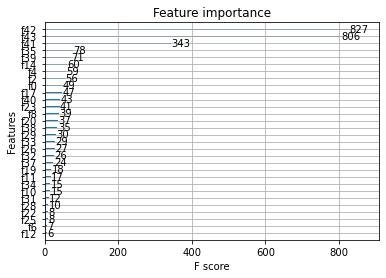

In [163]:
# Using XGBoost to train the model
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb=xgb.predict(X_test)
print(classification_report(y_test,y_xgb), confusion_matrix(y_test,y_xgb))
plot_importance(xgb,importance_type='weight')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1590
           1       0.56      0.58      0.57       520

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.79      0.78      0.78      2110
 [[1351  239]
 [ 219  301]]


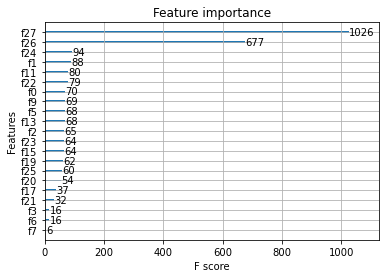

In [88]:
xgb=XGBClassifier()
xgb.fit(X_smote,y_smote)
y_xs=xgb.predict(X_test)
print(classification_report(y_test,y_xs), confusion_matrix(y_test,y_xs))
plot_importance(xgb,importance_type='weight')
plt.show()